Ciclo Crisis 52-55 ignorado (fuera de rango)


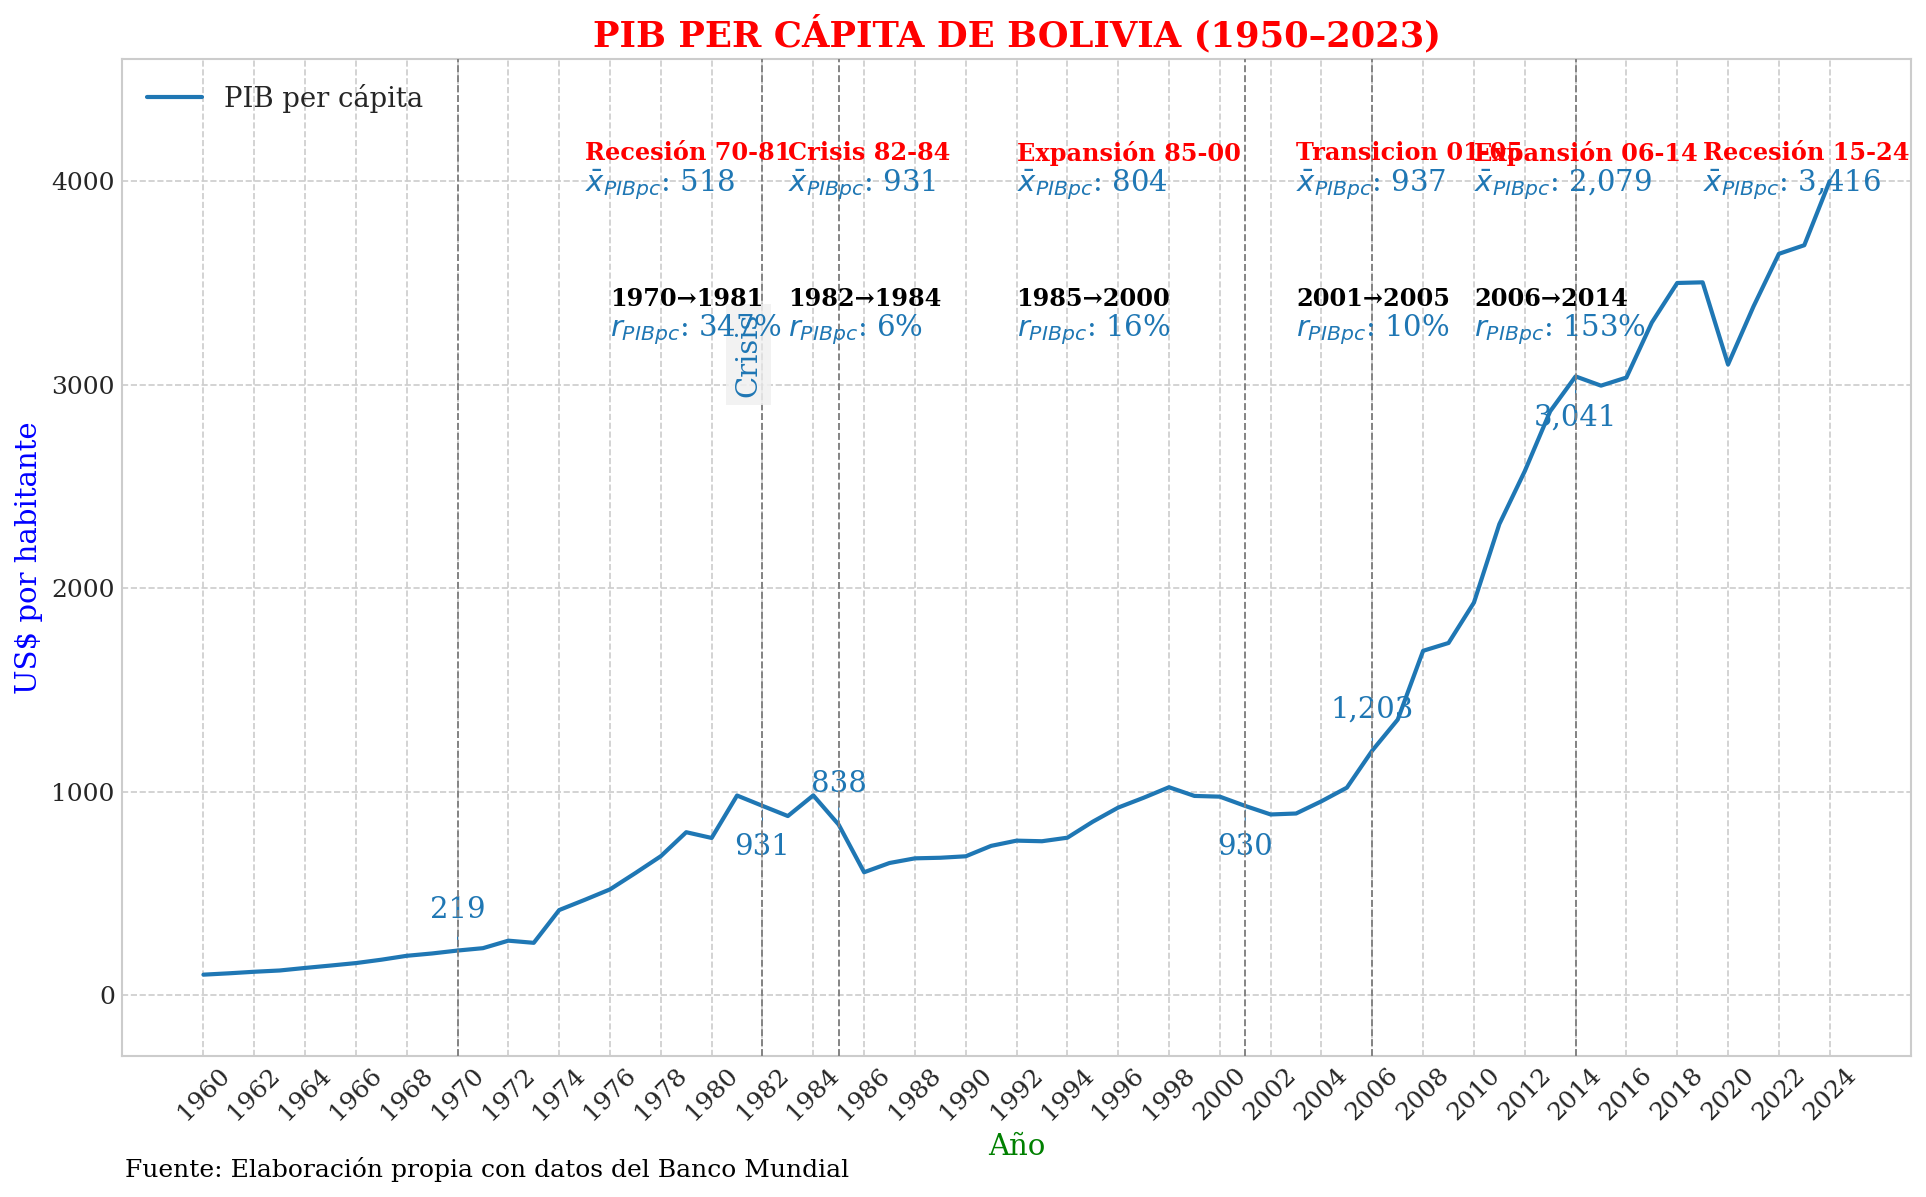

In [1]:
# ─────────────────────────────────────────────────────────────────────
# Importaciones
# ─────────────────────────────────────────────────────────────────────
import sys, os, sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath('../'))  # utilidades propias
from func_auxiliares.graficos_utils import *
from func_auxiliares.config import *

# ─────────────────────────────────────────────────────────────────────
# Configuración general
# ─────────────────────────────────────────────────────────────────────
output_dir = "../../../../assets/tesis/serie_completa/pib_percapita"
os.makedirs(output_dir, exist_ok=True)
set_style()

# Carga de datos
with sqlite3.connect('../../../../db/proyectomacro.db') as conn:
    df = (pd.read_sql('SELECT * FROM pib_percapita', conn)
            .set_index('año')
            .sort_index())

# Componentes y columnas
componentes = [
    ('pib_percapita', 'PIB per cápita'),
]
cols_componentes = [col for col, _ in componentes]

# Abreviaturas
abbr_map = {
    'pib_percapita': 'PIB pc',
}

# ─────────────────────────────────────────────────────────────────────
# Preparación
# ─────────────────────────────────────────────────────────────────────
annotate_years    = adjust_annot_years(df, annot_years)
CYCLES            = adjust_cycles(df, CYCLES)
cycle_stats       = {name: df.loc[period, cols_componentes].mean().to_dict()
                     for name, period in CYCLES.items()}
periodos          = adjust_periods(df, periodos_tasas)
custom_colors     = {
    'pib_percapita': '#1f77b4',
}

# ─────────────────────────────────────────────────────────────────────
# Offsets
# ─────────────────────────────────────────────────────────────────────
annotation_offsets = {
    'pib_percapita': {
        1952: (0,   -200),
        1956: (0,   -200),
        1970: (0,    200),
        1982: (0,   -200),
        1985: (0,    200),
        2001: (0,   -200),
        2006: (0,    200),
        2014: (0,   -200),
        2023: (0,    200),
    },
}

# 2) Hitos verticales (usa exactamente las claves de hitos_v)
hitos_offset = {a: 0.8 for a in hitos_v}

# 3) Posición de medias por ciclo (claves según CYCLES)
medias_offsets = {
    "Crisis 52-55":       (1953, 1),
    "Expansión 56-69":    (1962, 1),
    "Recesión 70-81":     (1975, 1),
    "Crisis 82-84":       (1983, 1),
    "Expansión 85-00":    (1992, 1),
    "Transicion 01-05":   (2003, 1),
    "Expansión 06-14":    (2010, 1),
    "Recesión 15-24":     (2019, 1),
}

# 4) Tasas de crecimiento anotadas por periodo (claves según periodos_tasas)
tasas_offsets = {
    "1952-1955": (1953, 0.83),
    "1956-1969": (1963, 0.83),
    "1970-1981": (1976, 0.83),
    "1982-1984": (1983, 0.83),
    "1985-2000": (1992, 0.83),
    "2001-2005": (2003, 0.83),
    "2006-2014": (2010, 0.83),
    "2015-2022": (2019, 0.83),
}

# 5) Desplazamientos de cajas de participación por periodo (solo si aplicara)
participation_offsets = {}

# ─────────────────────────────────────────────────────────────────────
# Gráfica
# ─────────────────────────────────────────────────────────────────────
fig, ax = init_base_plot(
    df,
    componentes,
    custom_colors,
    "PIB PER CÁPITA DE BOLIVIA (1950–2023)",
    "Año",
    "US$ por habitante",
    source_text="Fuente: Elaboración propia con datos del Banco Mundial"
)

add_hitos(
    ax, df.index, hitos_v, hitos_offset,
    line_kwargs={'linewidth': 0.9}
)

y_max = ax.get_ylim()[1]
line_spacing = y_max * 0.03
add_cycle_means_multi(
    ax, cycle_stats, medias_offsets,
    abbr_map, custom_colors,
    line_spacing
)

add_year_value_annotations(
    ax, df, annotate_years,
    cols_componentes, annotation_offsets,
    custom_colors, arrow_lw=0.5
)

add_period_growth_annotations_multi(
    ax, df, periodos,
    cols_componentes, tasas_offsets,
    custom_colors, abbr_map
)

ax.set_ylim(-300, df[cols_componentes].max().max() * 1.15)

plt.savefig(os.path.join(output_dir, "pib_percapita.png"))
plt.show()